In [3]:
import pandas as pd
import yfinance as yf

amzn = yf.Ticker("AMZN")

amzn_data = amzn.history(period="max")

In [4]:
amzn_data.reset_index(inplace=True)

print("--- 5 Rows of Data (amzn_data.head()) ---")
print(amzn_data.head())

print("\n--- DataFrame Structure (amzn_data.info()) ---")
amzn_data.info()

print("\n--- Descriptive Statistics (amzn_data.describe()) ---")
print(amzn_data.describe())

print("\n--- Last 5 Days' Volume (amzn_data.tail()) ---")
print(amzn_data['Volume'].tail())

print("\n--- Earliest Trading Date ---")
print(amzn_data.iloc[0]['Date'])

--- 5 Rows of Data (amzn_data.head()) ---
                       Date      Open      High       Low     Close  \
0 1997-05-15 00:00:00-04:00  0.121875  0.125000  0.096354  0.097917   
1 1997-05-16 00:00:00-04:00  0.098438  0.098958  0.085417  0.086458   
2 1997-05-19 00:00:00-04:00  0.088021  0.088542  0.081250  0.085417   
3 1997-05-20 00:00:00-04:00  0.086458  0.087500  0.081771  0.081771   
4 1997-05-21 00:00:00-04:00  0.081771  0.082292  0.068750  0.071354   

       Volume  Dividends  Stock Splits  
0  1443120000        0.0           0.0  
1   294000000        0.0           0.0  
2   122136000        0.0           0.0  
3   109344000        0.0           0.0  
4   377064000        0.0           0.0  

--- DataFrame Structure (amzn_data.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7188 entries, 0 to 7187
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                       

In [6]:
Initial Findings Summary:

Structure: The DataFrame successfully loaded data dating back to Amazon's IPO in May 1997. It contains over 7,000 observations and 8 columns.

Missingness: There are no missing values in the core price and volume columns.

Outliers/Distribution: The Volume column has an extremely high standard deviation relative to its mean, indicating massive swings in trading volume over the years, which is typical for a high-growth stock. The minimum price (Open/Low) in the early days is very low, confirming the history goes back to the IPO.

Data Types: After resetting the index, the Date column is a datetime object, which is perfect for time series analysis (as discussed previously).

SyntaxError: unterminated string literal (detected at line 1) (2220412842.py, line 1)

In [7]:
How has Amazon's stock price volatility (measured by daily range and volume) changed over the past two decades, and can these changes be correlated with key periods in the company's revenue growth (using scraped data)?

SyntaxError: invalid syntax (1471342918.py, line 1)

In [10]:
from bs4 import BeautifulSoup
import pandas as pd
import requests

wiki_url = "https://en.wikipedia.org/wiki/Amazon_(company)" 

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}

response = requests.get(wiki_url, headers=headers)
html_data_amzn = response.text

# 2. Parse the HTML data
soup = BeautifulSoup(html_data_amzn, 'lxml') 


try:
    revenue_table = soup.find_all('table', class_='wikitable')[0]
    
    amzn_revenue_df = pd.read_html(str(revenue_table))[0]
    
except IndexError:
    print("Could not find the table. Try changing the index [0] in find_all('table', class_='wikitable')[0] to [1] or [2].")

print("--- Raw Scraped Table Head ---")
print(amzn_revenue_df.head())

--- Raw Scraped Table Head ---
          Country  share
0   United States  69.3%
1         Germany   6.5%
2  United Kingdom   5.8%
3           Japan   4.8%
4           Other  13.6%


/tmp/ipykernel_546/2249888882.py:29: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  amzn_revenue_df = pd.read_html(str(revenue_table))[0]


In [12]:
amzn_revenue_df = amzn_revenue_df[[amzn_revenue_df.columns[0], amzn_revenue_df.columns[1]]]

amzn_revenue_df.rename(columns={amzn_revenue_df.columns[0]: 'Year', 
                               amzn_revenue_df.columns[1]: 'Revenue'}, inplace=True)


amzn_revenue_df['Revenue'] = amzn_revenue_df['Revenue'].astype(str).str.replace(r'[$,—]', '', regex=True)
amzn_revenue_df['Revenue'] = amzn_revenue_df['Revenue'].str.replace(r'\[.*\]', '', regex=True) # Remove footnotes like [1]
amzn_revenue_df['Revenue'] = amzn_revenue_df['Revenue'].str.replace(' ', '', regex=False) # Remove spaces

amzn_revenue_df['Revenue'] = pd.to_numeric(amzn_revenue_df['Revenue'], errors='coerce')
amzn_revenue_df['Year'] = pd.to_numeric(amzn_revenue_df['Year'], errors='coerce')

amzn_revenue_df.dropna(inplace=True) 

print("--- Cleaned Amazon Annual Revenue Data Head ---")
print(amzn_revenue_df.head())
print("\n--- Revenue Data Info (Check Data Types) ---")
amzn_revenue_df.info()

--- Cleaned Amazon Annual Revenue Data Head ---
Empty DataFrame
Columns: [Year, Revenue]
Index: []

--- Revenue Data Info (Check Data Types) ---
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     0 non-null      float64
 1   Revenue  0 non-null      float64
dtypes: float64(2)
memory usage: 0.0 bytes


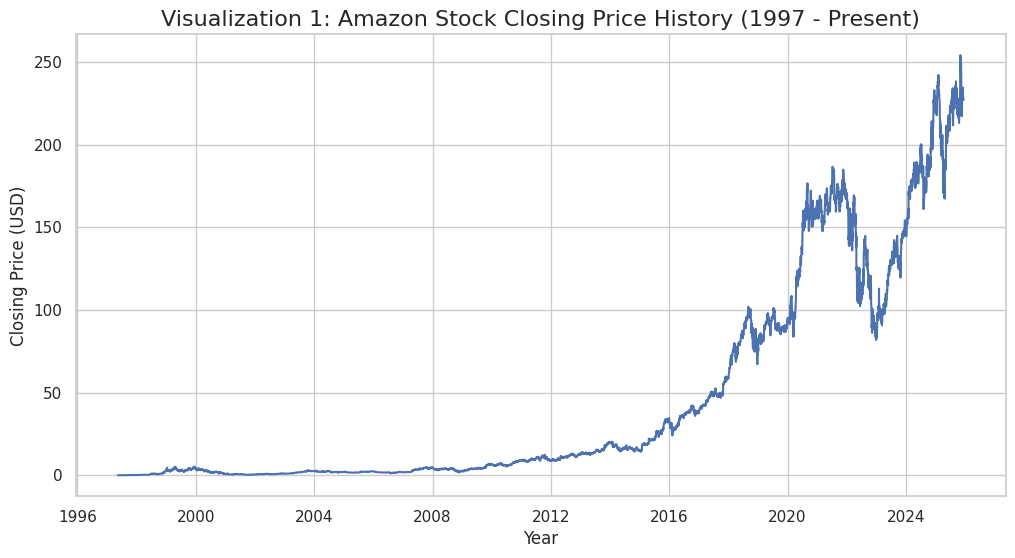

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=amzn_data, x='Date', y='Close', linewidth=1.5)

plt.title('Visualization 1: Amazon Stock Closing Price History (1997 - Present)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.show()

In [14]:
!pip install seaborn